In [ ]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn import datasets
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report, roc_curve, RocCurveDisplay, auc, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# 1.

##  DecisionTreeClassifier

In [ ]:
!wget 'https://drive.google.com/u/0/uc?id=1UYJZIKktZYLLQffp7qmEM1y9wz5zbo6j&export=download' -O smoke_detector_task.csv


--2023-04-07 03:51:42--  https://drive.google.com/u/0/uc?id=1UYJZIKktZYLLQffp7qmEM1y9wz5zbo6j&export=download
Resolving drive.google.com (drive.google.com)... 74.125.26.139, 74.125.26.113, 74.125.26.101, ...
Connecting to drive.google.com (drive.google.com)|74.125.26.139|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://drive.google.com/uc?id=1UYJZIKktZYLLQffp7qmEM1y9wz5zbo6j&export=download [following]
--2023-04-07 03:51:42--  https://drive.google.com/uc?id=1UYJZIKktZYLLQffp7qmEM1y9wz5zbo6j&export=download
Reusing existing connection to drive.google.com:443.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-90-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/dh0jmsq8ivfo5s4ppu4vhfksu0itn0o2/1680839475000/06789500609444976556/*/1UYJZIKktZYLLQffp7qmEM1y9wz5zbo6j?e=download&uuid=c2322bbf-2820-458f-984a-9a83b5772e8e [following]
--2023-04-07 03:51:43--  https://doc-08-90-docs.googleusercontent.com/do

In [ ]:

df = pd.read_csv("smoke_detector_task.csv")

df = df.replace('Yes',1).replace('No', 0).astype(float)

df = df.dropna()
data = df.drop_duplicates()
#df.info()
df = df.drop(["Unnamed: 0"], axis = 1)
df = df.drop(["UTC"], axis = 1)

print("\n", data['Fire Alarm'].value_counts())



df.head()



 1.0    43293
0.0    17310
Name: Fire Alarm, dtype: int64


,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,20.000,57.36,0.0,400.0,12306.0,18520.0,939.735,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20.015,56.67,0.0,400.0,12345.0,18651.0,939.744,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,20.029,55.96,0.0,400.0,12374.0,18764.0,939.738,0.0,0.0,0.0,0.0,0.0,2.0,0.0
3,20.044,55.28,0.0,400.0,12390.0,18849.0,939.736,0.0,0.0,0.0,0.0,0.0,3.0,0.0
4,20.059,54.69,0.0,400.0,12403.0,18921.0,939.744,0.0,0.0,0.0,0.0,0.0,4.0,0.0


In [ ]:
y = df["Fire Alarm"]
X = df.drop(["Fire Alarm"], axis = 1)

y_cart_class = df["Fire Alarm"].values
X_cart_class = df.drop(["Fire Alarm"], axis=1).values
X_train_cart_class, X_test_cart_class, y_train_cart_class, y_test_cart_class = train_test_split(X_cart_class, y_cart_class, test_size=1/3)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3)

X_train_class = X_train
X_test_class = X_test
y_train_class = y_train
y_test_class = y_test



In [ ]:
grid_space = {
  'criterion': ["gini", "entropy", "log_loss"],
  'max_depth': np.arange(1, X_train.shape[1], 1),
  #'max_leaf_nodes': np.array(range(1, int((X_train.shape[0])**1/4)))
}

grid = GridSearchCV(DecisionTreeClassifier(),param_grid=grid_space,cv=3,scoring='accuracy')

In [ ]:
model_grid = grid.fit(X_train,y_train)

In [ ]:
model_grid.best_params_
opt_max_depth = model_grid.best_params_['max_depth']
opt_criterion = model_grid.best_params_['criterion']
#opt_max_leaf = model_grid.best_params_['max_leaf_nodes']
opt_criterion

'entropy'

|--- feature_12 <= 5743.50
|   |--- feature_4 <= 13202.50
|   |   |--- feature_6 <= 933.98
|   |   |   |--- feature_12 <= 36.00
|   |   |   |   |--- class: 0.0
|   |   |   |--- feature_12 >  36.00
|   |   |   |   |--- class: 1.0
|   |   |--- feature_6 >  933.98
|   |   |   |--- feature_12 <= 3270.50
|   |   |   |   |--- feature_12 <= 4.50
|   |   |   |   |   |--- feature_4 <= 12857.50
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- feature_4 >  12857.50
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- feature_12 >  4.50
|   |   |   |   |   |--- class: 0.0
|   |   |   |--- feature_12 >  3270.50
|   |   |   |   |--- feature_6 <= 938.56
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- feature_6 >  938.56
|   |   |   |   |   |--- class: 1.0
|   |--- feature_4 >  13202.50
|   |   |--- feature_6 <= 939.63
|   |   |   |--- feature_6 <= 933.94
|   |   |   |   |--- feature_12 <= 32.50
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- feature_12 >  32.

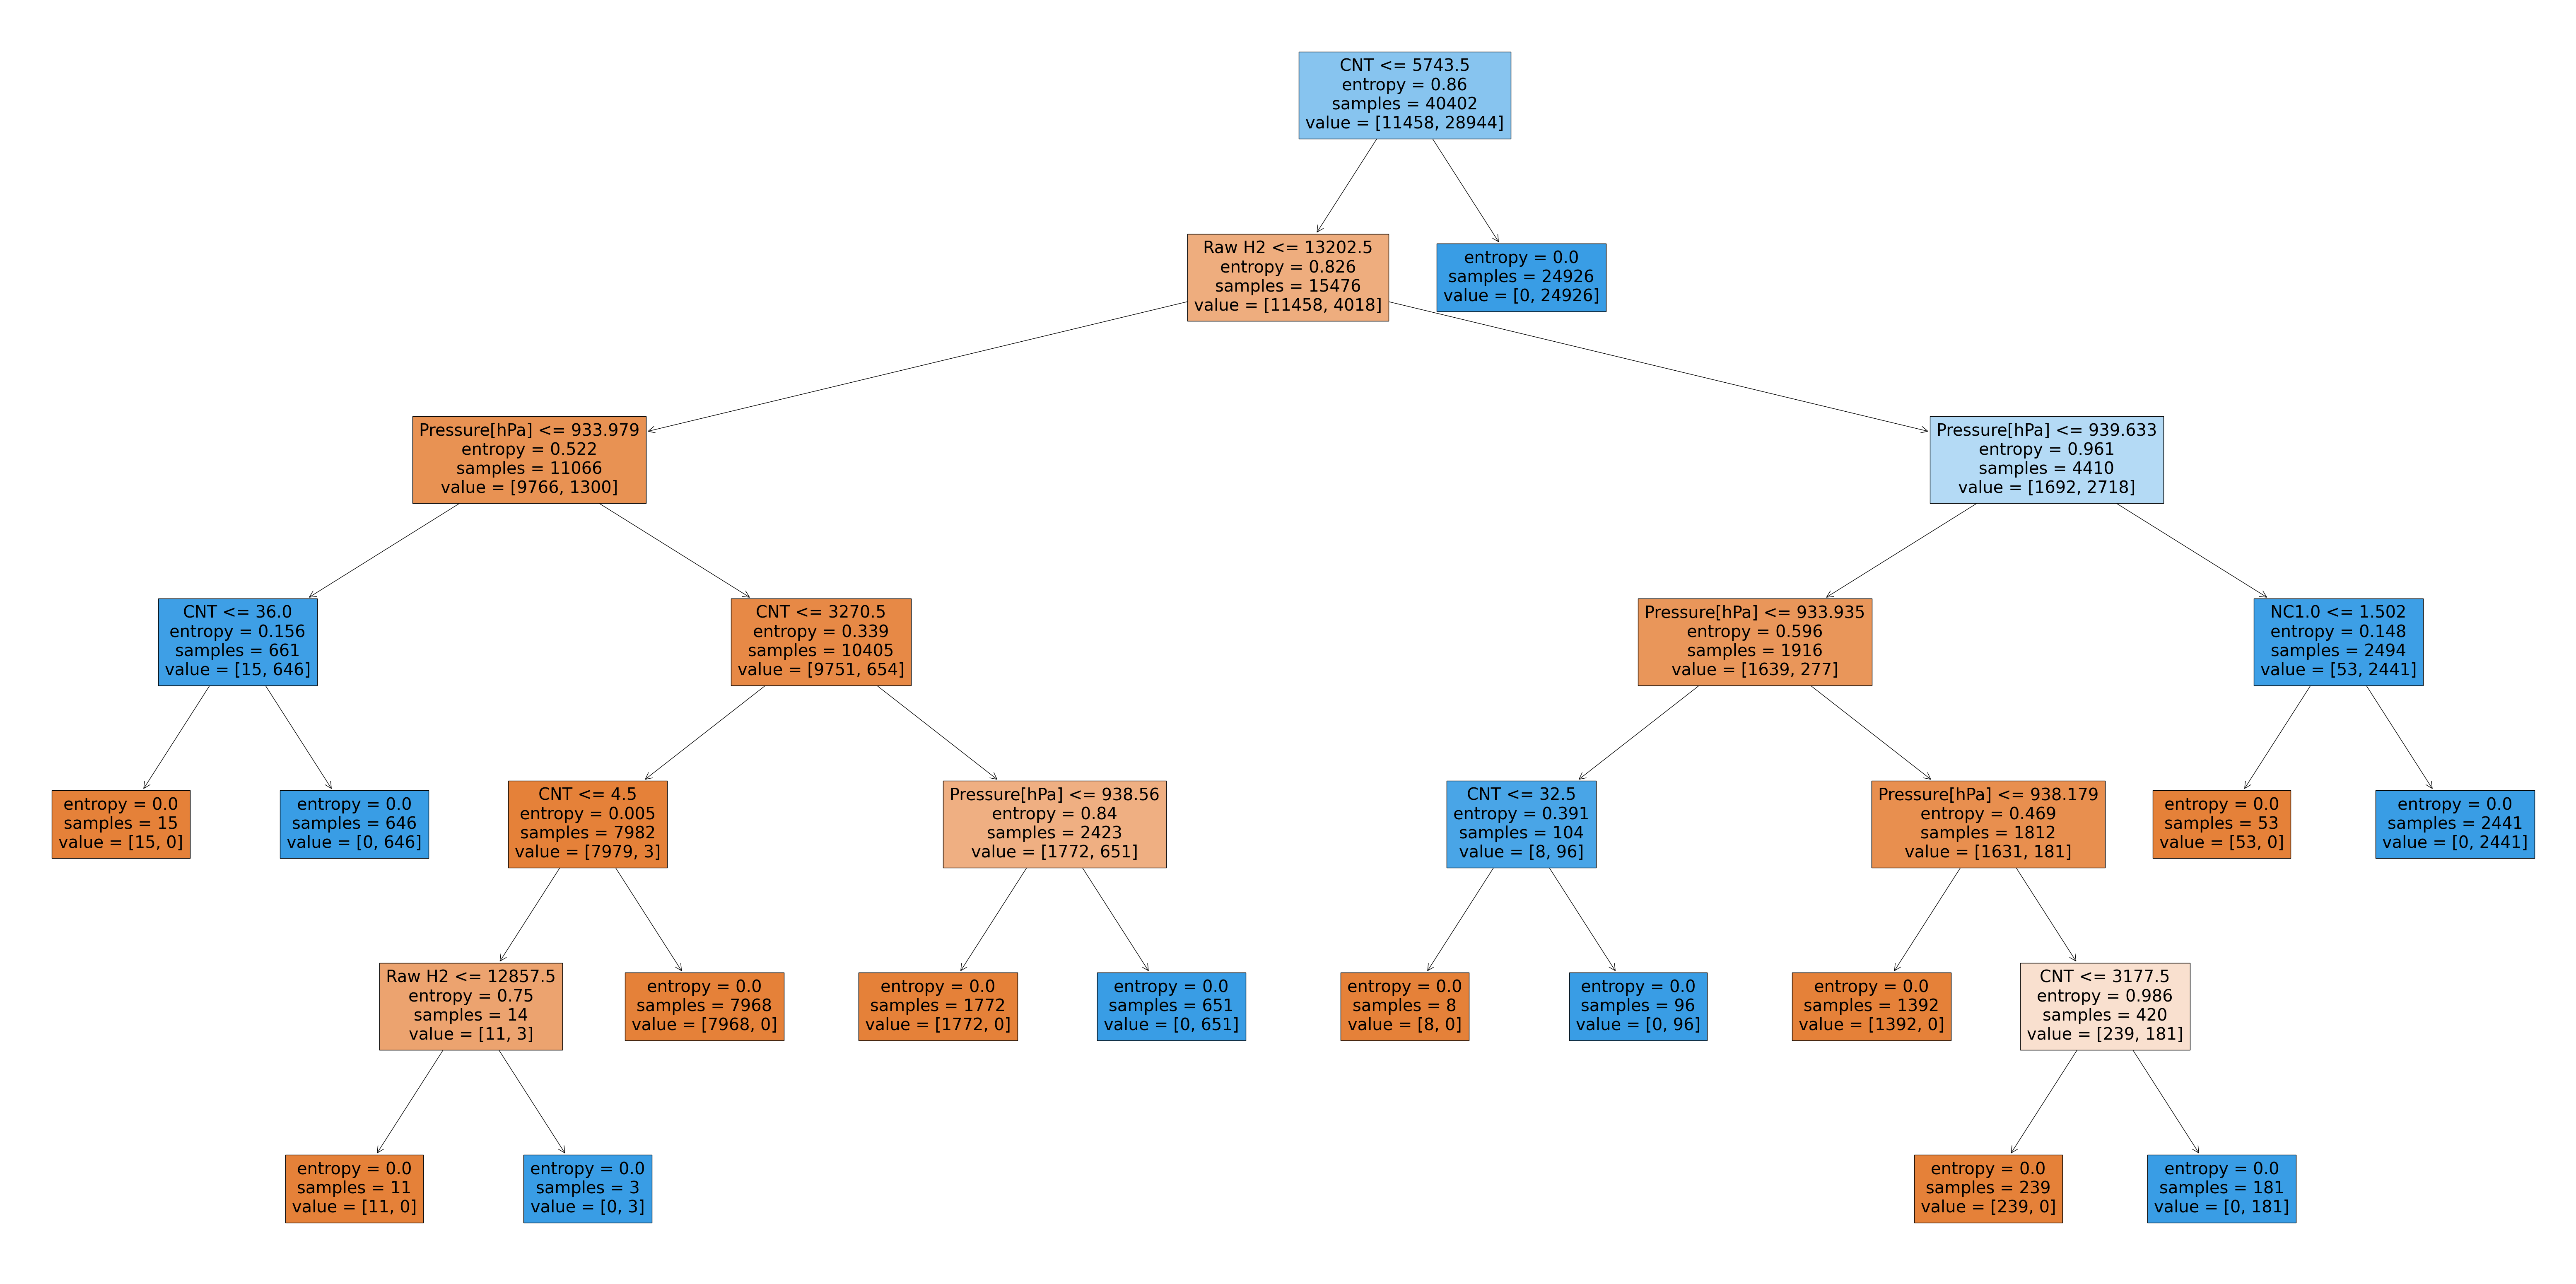

In [ ]:
tree_class = DecisionTreeClassifier(max_depth=opt_max_depth, criterion=opt_criterion)
tree_class.fit(X_train, y_train)

text_representation = tree.export_text(tree_class)
print(text_representation)


from sklearn.tree import plot_tree, export_text
plt.figure(figsize =(80,40))

plot_tree(tree_class, feature_names=X_train.columns, max_depth=opt_max_depth, filled=True);

In [ ]:
pred_train = tree_class.predict(X_train)
pred_test = tree_class.predict(X_test)

print(mean_squared_error(y_train, pred_train))
print(mean_squared_error(y_test, pred_test))
print(accuracy_score(y_test, pred_test))

0.07405573981486065
0.07732290480669274
0.9226770951933073


In [ ]:
print('Precision, Recall, F\n', classification_report(y_train, pred_train))

Precision, Recall, F
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     11458
         1.0       1.00      1.00      1.00     28944

    accuracy                           1.00     40402
   macro avg       1.00      1.00      1.00     40402
weighted avg       1.00      1.00      1.00     40402



## DecisionTreeRegressor

In [ ]:
!wget 'https://drive.google.com/u/0/uc?id=1mpuQWoBEVsAYL7JIMvkAHkdaKtLOz_b2&export=download' -O mumbai_houses_task.csv


--2023-04-07 03:56:40--  https://drive.google.com/u/0/uc?id=1mpuQWoBEVsAYL7JIMvkAHkdaKtLOz_b2&export=download
Resolving drive.google.com (drive.google.com)... 74.125.26.139, 74.125.26.101, 74.125.26.113, ...
Connecting to drive.google.com (drive.google.com)|74.125.26.139|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://drive.google.com/uc?id=1mpuQWoBEVsAYL7JIMvkAHkdaKtLOz_b2&export=download [following]
--2023-04-07 03:56:40--  https://drive.google.com/uc?id=1mpuQWoBEVsAYL7JIMvkAHkdaKtLOz_b2&export=download
Reusing existing connection to drive.google.com:443.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-90-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/nol8dhl8fmldu2qhaap8le81nufkm3u6/1680839775000/06789500609444976556/*/1mpuQWoBEVsAYL7JIMvkAHkdaKtLOz_b2?e=download&uuid=3331df3b-988f-47dc-858b-1f9c8d249a9d [following]
--2023-04-07 03:56:41--  https://doc-10-90-docs.googleusercontent.com/do

In [ ]:
df = pd.read_csv("mumbai_houses_task.csv")

df['Status'] = df['Status'].fillna('Ready to Move')
df['Furnished_status'] = df['Furnished_status'].fillna('Unfurnished')
df = pd.get_dummies(df)
print(pd.isnull(df).sum())
df


price                                0
area                                 0
latitude                             0
longitude                            0
Bedrooms                             0
Bathrooms                            0
Balcony                              0
parking                              0
Lift                                 0
Status_Ready to Move                 0
Status_Under Construction            0
neworold_New Property                0
neworold_Resale                      0
Furnished_status_Furnished           0
Furnished_status_Semi-Furnished      0
Furnished_status_Unfurnished         0
type_of_building_Flat                0
type_of_building_Individual House    0
dtype: int64


,price,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,parking,Lift,Status_Ready to Move,Status_Under Construction,neworold_New Property,neworold_Resale,Furnished_status_Furnished,Furnished_status_Semi-Furnished,Furnished_status_Unfurnished,type_of_building_Flat,type_of_building_Individual House
0,22400000.0,629.0,19.032800,72.896357,2.0,2.0,0.0,0.0,0.0,0,1,1,0,0,0,1,1,0
1,35000000.0,974.0,19.032800,72.896357,3.0,2.0,0.0,0.0,0.0,0,1,1,0,0,0,1,1,0
2,31700000.0,968.0,19.085600,72.909277,3.0,3.0,0.0,0.0,0.0,0,1,1,0,0,0,1,1,0
3,18700000.0,629.0,19.155756,72.846862,2.0,2.0,2.0,2.0,2.0,1,0,1,0,0,0,1,1,0
4,13500000.0,1090.0,19.177555,72.849887,2.0,2.0,0.0,0.0,0.0,1,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,19500000.0,810.0,19.138320,72.810020,2.0,2.0,0.0,0.0,0.0,1,0,0,1,0,1,0,1,0
6251,22000000.0,1400.0,19.221920,72.854250,3.0,3.0,1.0,1.0,1.0,1,0,0,1,0,0,1,1,0
6252,20000000.0,750.0,19.144320,72.824111,2.0,2.0,0.0,0.0,0.0,1,0,0,1,0,0,1,1,0
6253,11000000.0,700.0,19.047201,72.872225,2.0,2.0,0.0,0.0,0.0,1,0,0,1,1,0,0,1,0


In [ ]:
y = df["price"]
X = df.drop(["price"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3)
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

X_train_reg = X_train
X_test_reg = X_test
y_train_reg = y_train
y_test_reg = y_test

y_cart = df["price"].values
X_cart = df.drop(["price"], axis=1).values
X_train_cart, X_test_cart, y_train_cart, y_test_cart = train_test_split(X_cart, y_cart, test_size=1/3)

X_train.shape, y_train.shape, X_test.shape, y_test.shape


((4170, 17), (4170, 1), (2085, 17), (2085, 1))

In [ ]:
grid_space = {
  'criterion': ["squared_error", "friedman_mse", "absolute_error", "poisson"],
  'max_depth': np.arange(1, 10, 1),
  'max_leaf_nodes': np.arange(1, 100, 3)
}

grid = GridSearchCV(DecisionTreeRegressor(),param_grid=grid_space,cv=3)

In [ ]:
model_grid = grid.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
108 fits failed out of a total of 3564.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
108 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.9/dist-packages/sklearn/base.py", line 600, in _validat

In [ ]:
model_grid.best_params_
opt_max_depth = model_grid.best_params_['max_depth']
opt_criterion = model_grid.best_params_['criterion']
opt_max_leaf = model_grid.best_params_['max_leaf_nodes']
opt_max_depth

9

In [ ]:
tree_reg = DecisionTreeRegressor(max_depth=opt_max_depth, criterion=opt_criterion, max_leaf_nodes = opt_max_leaf)
tree_reg.fit(X_train, y_train)

text_representation = tree.export_text(tree_reg)
print(text_representation)

fig = plt.figure(figsize=(80,40))
#plot_tree(tree_reg, feature_names=X_train.columns, max_depth=opt_max_depth, filled=True)

|--- feature_0 <= 1497.50
|   |--- feature_1 <= 19.23
|   |   |--- feature_4 <= 2.50
|   |   |   |--- feature_1 <= 19.15
|   |   |   |   |--- feature_2 <= 72.86
|   |   |   |   |   |--- feature_1 <= 19.10
|   |   |   |   |   |   |--- feature_2 <= 72.83
|   |   |   |   |   |   |   |--- feature_0 <= 837.50
|   |   |   |   |   |   |   |   |--- value: [27924444.44]
|   |   |   |   |   |   |   |--- feature_0 >  837.50
|   |   |   |   |   |   |   |   |--- value: [42033037.97]
|   |   |   |   |   |   |--- feature_2 >  72.83
|   |   |   |   |   |   |   |--- value: [27651304.35]
|   |   |   |   |   |--- feature_1 >  19.10
|   |   |   |   |   |   |--- value: [22602136.75]
|   |   |   |   |--- feature_2 >  72.86
|   |   |   |   |   |--- feature_0 <= 922.50
|   |   |   |   |   |   |--- value: [16354907.98]
|   |   |   |   |   |--- feature_0 >  922.50
|   |   |   |   |   |   |--- value: [21472464.59]
|   |   |   |--- feature_1 >  19.15
|   |   |   |   |--- feature_2 <= 73.05
|   |   |   |   |   |--

<Figure size 8000x4000 with 0 Axes>

In [ ]:
pred_train = tree_reg.predict(X_train)
pred_test = tree_reg.predict(X_test)

#print(mean_squared_error(y_train, pred_train))
#print(mean_squared_error(y_test, pred_test))

print(tree_reg.score(X_train, y_train))
tree_reg.score(X_test, y_test)

0.8239988475445041


0.656926769002201

# 2. ансамбли

### BaggingClassifier

In [ ]:
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, StackingClassifier, RandomForestClassifier
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor

In [ ]:
grid_space = {
  #'criterion': ["gini", "entropy", "log_loss"],
  'n_estimators': np.arange(1, 150, 10),
  #'max_samples': np.arange(0.6, 1, 0.1)
}

grid = RandomizedSearchCV(BaggingClassifier(),grid_space,cv=3, scoring='accuracy')


In [ ]:
model_grid = grid.fit(X_train_class, y_train_class)

In [ ]:
model_grid.best_params_
opt_est = model_grid.best_params_['n_estimators']
#opt_criterion = model_grid.best_params_['criterion']
#opt_max_samples = model_grid.best_params_['max_samples']
opt_est

51

In [ ]:
bag_model = BaggingClassifier(n_estimators = opt_est).fit(X_train_class, y_train_class)
bag_model.score(X_test_class, y_test_class)

0.9998019900004951

In [ ]:
pred_test = bag_model.predict(X_test_class)
print(accuracy_score(y_test_class, pred_test))

0.9998019900004951


### GradientBoostingClassifier

In [ ]:
grid_space = {
  'criterion': ['friedman_mse', 'squared_error'],
  'n_estimators': np.arange(1, 150, 10),
  'max_depth': np.arange(2, 15, 1)
}

grid = RandomizedSearchCV(GradientBoostingClassifier(),grid_space,cv=3, scoring='accuracy')

In [ ]:
model_grid = grid.fit(X_train_class, y_train_class)

In [ ]:
model_grid.best_params_

{'n_estimators': 131, 'max_depth': 6, 'criterion': 'squared_error'}

In [ ]:
pred_test = model_grid.predict(X_test_class)
print(accuracy_score(y_test_class, pred_test))

0.9999009950002475


### StackingClassifier

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [ ]:
estimators = [
    ('lr', LogisticRegression()),
    ('dt', DecisionTreeClassifier()),
    ('rf', RandomForestClassifier())]

model_stack = StackingClassifier(estimators=estimators, final_estimator=SVC())

In [ ]:
model_stack.fit(X_train_class, y_train_class)

In [ ]:
grid_space = {
  'stack_method' : ['predict_proba', 'decision_function', 'predict', 'auto']
}

grid = RandomizedSearchCV(StackingClassifier(estimators=estimators, final_estimator=SVC()),grid_space,cv=3, scoring='accuracy')
model_grid = grid.fit(X_train_class, y_train_class)

In [ ]:
model_stack.score(X_train_class, y_train_class)

pred_test = model_stack.predict(X_test_class)
print(accuracy_score(y_test_class, pred_test))

pred_test = model_grid.predict(X_test_class)
print(accuracy_score(y_test_class, pred_test))

0.9998019900004951
0.9999009950002475


### BaggingRegressor

In [ ]:
grid_space = {
  #'criterion': ["gini", "entropy", "log_loss"],
  'n_estimators': np.arange(1, 150, 10),
  #'max_samples': np.arange(0.6, 1, 0.1)
}

grid = RandomizedSearchCV(BaggingRegressor(),grid_space,cv=3)


In [ ]:
model_grid = grid.fit(X_train_reg, y_train_reg)

In [ ]:
model_grid.best_params_
opt_est = model_grid.best_params_['n_estimators']
#opt_criterion = model_grid.best_params_['criterion']
#opt_max_samples = model_grid.best_params_['max_samples']
opt_est

111

In [ ]:
bag_model = BaggingRegressor(n_estimators = opt_est).fit(X_train_reg, y_train_reg)
bag_model.score(X_test_reg, y_test_reg)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


0.7554473702486506

## GradientBoostingRegressor

In [ ]:
grid_space = {
  'criterion': ['friedman_mse', 'squared_error'],
  'n_estimators': np.arange(1, 150, 10),
  'max_depth': np.arange(2, 15, 1)
}

grid = RandomizedSearchCV(GradientBoostingRegressor(),grid_space,cv=3)

In [ ]:
model_grid = grid.fit(X_train_reg, y_train_reg)

In [ ]:
model_grid.best_params_

{'n_estimators': 111, 'max_depth': 5, 'criterion': 'squared_error'}

In [ ]:
pred_test = model_grid.predict(X_test_reg)

print(r2_score(y_test_reg, pred_test))

0.7823334215179768


## StackingRegressor

In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.tree import  DecisionTreeRegressor
from sklearn.svm import SVR
estimators = [
    ('lr', RidgeCV()),
    ('dt', DecisionTreeRegressor()),
    ('svr', LinearSVR(random_state=1))
]

reg = StackingRegressor(
    estimators=estimators,
    final_estimator=RandomForestRegressor(n_estimators=10)
)

model = reg.fit(X_train_reg, y_train_reg)#.score(X_test_reg, y_test_reg)
pred_test = model.predict(X_test_reg)
print(r2_score(y_test_reg, pred_test))

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_stacking.py:957: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.679563211221978


# 3. Catboost

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 11.4 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier, CatBoostRegressor

In [ ]:
model_class = CatBoostClassifier(iterations=2,
                           learning_rate=1,
                           depth=2)
# Fit model_class
model_class.fit(X_train_class, y_train_class)
# Get predicted classes
preds_class = model_class.predict(X_test_class)

model_class.score(X_test_class, y_test_class)

0:	learn: 0.2599792	total: 5.26ms	remaining: 5.26ms
1:	learn: 0.1409986	total: 9.7ms	remaining: 0us


0.975842780060393

In [ ]:
model_reg = CatBoostRegressor(iterations=8,
                           learning_rate=0.8,
                           depth=5)
# Fit model_reg
model_reg.fit(X_train_reg, y_train_reg)
# Get predictions
preds = model_reg.predict(X_test_reg)

print(r2_score(y_test_reg, preds))




grid = {'learning_rate': [0.03, 0.2, 0.5],
        'depth': [4, 6],
        'iterations': np.arange(10, 50, 10)}

grid_search_result = CatBoostRegressor().grid_search(grid, X=X_train_reg, y=y_train_reg)

0:	learn: 17693458.9374288	total: 6.7ms	remaining: 46.9ms
1:	learn: 14786643.6366461	total: 14.8ms	remaining: 44.4ms
2:	learn: 13755877.4574996	total: 19.4ms	remaining: 32.3ms
3:	learn: 13408150.0548804	total: 22.7ms	remaining: 22.7ms
4:	learn: 12767294.6387977	total: 27.8ms	remaining: 16.7ms
5:	learn: 12556084.1174493	total: 30.1ms	remaining: 10ms
6:	learn: 12245634.7649263	total: 32.3ms	remaining: 4.61ms
7:	learn: 12004235.4320449	total: 34.3ms	remaining: 0us
0.7269429673189084
0:	learn: 38758711.3398200	test: 35139640.6026188	best: 35139640.6026188 (0)	total: 2.32ms	remaining: 20.9ms
1:	learn: 37917404.9133959	test: 34343213.4015038	best: 34343213.4015038 (1)	total: 4.8ms	remaining: 19.2ms
2:	learn: 37107028.6798093	test: 33563913.0994250	best: 33563913.0994250 (2)	total: 7.13ms	remaining: 16.6ms
3:	learn: 36310184.1287518	test: 32761044.8350730	best: 32761044.8350730 (3)	total: 9.35ms	remaining: 14ms
4:	learn: 35565869.6844136	test: 32028614.0010949	best: 32028614.0010949 (4)	total

In [ ]:
print(grid_search_result['params'])

model_reg = CatBoostRegressor(iterations=40, depth= 6, learning_rate=0.5)

model_reg.fit(X_train_reg, y_train_reg)
preds = model_reg.predict(X_test_reg)

print(r2_score(y_test_reg, preds))

{'depth': 6, 'iterations': 40, 'learning_rate': 0.5}
0:	learn: 20302238.0939976	total: 6.1ms	remaining: 238ms
1:	learn: 16838539.0059898	total: 20.2ms	remaining: 383ms
2:	learn: 14945876.5628191	total: 26.3ms	remaining: 324ms
3:	learn: 13503799.0594702	total: 31.8ms	remaining: 286ms
4:	learn: 12718391.1009768	total: 34.2ms	remaining: 239ms
5:	learn: 12489205.3869696	total: 37.7ms	remaining: 213ms
6:	learn: 11961338.0349752	total: 39.7ms	remaining: 187ms
7:	learn: 11786471.3016191	total: 42.1ms	remaining: 168ms
8:	learn: 11624326.1418055	total: 45.1ms	remaining: 155ms
9:	learn: 11392341.2421737	total: 48ms	remaining: 144ms
10:	learn: 11218194.6881560	total: 50.1ms	remaining: 132ms
11:	learn: 11026435.7023812	total: 52.2ms	remaining: 122ms
12:	learn: 10816969.1598045	total: 55ms	remaining: 114ms
13:	learn: 10690919.0103960	total: 57.7ms	remaining: 107ms
14:	learn: 10628562.6046537	total: 60.7ms	remaining: 101ms
15:	learn: 10579388.0406683	total: 67.4ms	remaining: 101ms
16:	learn: 1047539

# 4. CART

In [ ]:
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value != None

### Classifacation

In [ ]:
class DecisionTree_class:
    def __init__(self, max_depth=10, min_samples=10):
        self.max_depth = max_depth
        self.min_samples = min_samples
        self.tree = None

    def fit(self, X, y):
        self.tree = self.grow_tree(X, y)

    def predict(self, X):
        return np.array([self.travers_tree(x, self.tree) for x in X])

    def gini(self, y):
        classes = {}
        for label in y:
            if label not in classes:
                classes[label] = 0
            classes[label] += 1
        gini = 1
        for label in classes:
            p = classes[label] / len(y)
            gini -= p ** 2

        return gini


    def most_common(self, y):
        labels = np.unique(y)
        count = [list(y).count(i) for i in labels]
        return labels[np.argmax(count)]

    def best_split(self, X, y):
        best_feature, best_threshold = None, None
        best_gain = -1

        for i in range(X.shape[1]):
            thresholds = np.unique(X[:, i])
            for threshold in thresholds:
                gain = self.information_gain(X[:, i], y, threshold)
                if gain > best_gain:
                    best_gain = gain
                    best_feature = i
                    best_threshold = threshold
        return best_feature, best_threshold

    def information_gain(self, X_column, y, threshold):
        if len(np.unique(y)) == 1:
            return 0

        n = len(y)
        parent = self.gini(y)

        left_indexes = np.argwhere(X_column <= threshold).flatten()
        right_indexes = np.argwhere(X_column > threshold).flatten()

        gini_l, n_l = self.gini(y[left_indexes]), len(left_indexes)
        gini_r, n_r = self.gini(y[right_indexes]), len(right_indexes)

        child = (n_l / n) * gini_l + (n_r / n) * gini_r
        return parent - child

    def grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        if n_samples <= self.min_samples or depth >= self.max_depth or n_labels == 1:
            return Node(value=self.most_common(y))

        best_feature, best_threshold = self.best_split(X, y)

        left_indexes = np.argwhere(X[:, best_feature] <= best_threshold).flatten()
        right_indexes = np.argwhere(X[:, best_feature] > best_threshold).flatten()

        if len(left_indexes) == 0 or len(right_indexes) == 0:
            return Node(value=self.most_common(y))

        left = self.grow_tree(X[left_indexes, :], y[left_indexes], depth + 1)
        right = self.grow_tree(X[right_indexes, :], y[right_indexes], depth + 1)

        return Node(best_feature, best_threshold, left, right)

    def travers_tree(self, x, tree):
        if tree.is_leaf_node():
            return tree.value

        if x[tree.feature] <= tree.threshold:
            return self.travers_tree(x, tree.left)
        return self.travers_tree(x, tree.right)

In [ ]:
clas = DecisionTree_class()
clas.fit(X_train_cart, y_train_cart_class)

y_class_pred = clas.predict(X_test_cart_class)



In [ ]:
print(accuracy_score(y_test_cart_class, y_class_pred))

0.8035245779911886


### Regression

In [ ]:
class DecisionTree_reg:
    def __init__(self, max_depth=20, min_samples=10):
        self.max_depth = max_depth
        self.min_samples = min_samples
        self.tree = []

    def fit(self, X, y):
        self.tree = self.grow_tree(X, y)

    def predict(self, X):
        return np.array([self.travers_tree(x, self.tree) for x in X])

    def most_common(self, y):
        return np.sum(y) / len(y)

    def MSE(self, y):
        predict = np.sum(y) / len(y)
        mse = np.sum((predict - y) ** 2) / len(y)
        #mae = np.sum(np.abs(predict - y)) / len(y)
        return mse

    def best_split(self, X, y):
        best_feature, best_threshold = None, None
        best_gain = -1

        for i in range(X.shape[1]):
            thresholds = np.unique(X[:, i])
            for threshold in thresholds:
                gain = self.information_gain(X[:, i], y, threshold)
                if gain > best_gain:
                    best_gain = gain
                    best_feature = i
                    best_threshold = threshold
        return best_feature, best_threshold

    def information_gain(self, X_column, y, threshold):
        n = len(y)
        parent = self.MSE(y)

        left_indexes = np.argwhere(X_column <= threshold).flatten()
        right_indexes = np.argwhere(X_column > threshold).flatten()

        child = 0

        if len(left_indexes) != 0:
            e_l, n_l = self.MSE(y[left_indexes]), len(left_indexes)
            child += (n_l / n) * e_l
        if len(right_indexes) != 0:
            e_r, n_r = self.MSE(y[right_indexes]), len(right_indexes)
            child += (n_r / n) * e_r

        return parent - child

    def grow_tree(self, X, y, depth=0):
        n_samples = X.shape[0]

        if n_samples <= self.min_samples or depth >= self.max_depth:
            return Node(value=self.most_common(y))

        best_feature, best_threshold = self.best_split(X, y)

        left_indexes = np.argwhere(X[:, best_feature] <= best_threshold).flatten()
        right_indexes = np.argwhere(X[:, best_feature] > best_threshold).flatten()

        if len(left_indexes) == 0 or len(right_indexes) == 0:
            return Node(value=self.most_common(y))

        left = self.grow_tree(X[left_indexes, :], y[left_indexes], depth + 1)
        right = self.grow_tree(X[right_indexes, :], y[right_indexes], depth + 1)

        return Node(best_feature, best_threshold, left, right)

    def travers_tree(self, x, tree):
        if tree.is_leaf_node():
            return tree.value

        if x[tree.feature] <= tree.threshold:
            return self.travers_tree(x, tree.left)
        return self.travers_tree(x, tree.right)

In [ ]:
reg = DecisionTree_reg()
reg.fit(X_train_cart, y_train_cart)
y_pred_cart = reg.predict(X_test_cart)

In [ ]:
print(r2_score(y_test_cart,y_pred_cart))

0.6868193469073884


In [ ]:
from sklearn.datasets import make_regression
X_1, y_1 = make_regression(n_samples=5, n_features=2, noise=1, random_state=42)
